# Tweets Sentiment analysis
> Analyzing twitter sentiment on COVID related issue from the first 6 months 

- toc: true 
- badges: true
- comments: true
- categories: [tweetanalysis]
- image: images/chart-preview.png

# About

This notebook is a demonstration of some of capabilities of [fastpages](https://github.com/fastai/fastpages) with notebooks.


With `fastpages` you can save your jupyter notebooks into the `_notebooks` folder at the root of your repository, and they will be automatically be converted to Jekyll compliant blog posts!


## Front Matter

The first cell in your Jupyter Notebook or markdown blog post contains front matter. Front matter is metadata that can turn on/off options in your Notebook. It is formatted like this:

```
# "My Title"
> "Awesome summary"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Hamel Husain & Jeremy Howard
- categories: [fastpages, jupyter]
```

- Setting `toc: true` will automatically generate a table of contents
- Setting `badges: true` will automatically include GitHub and Google Colab links to your notebook.
- Setting `comments: true` will enable commenting on your blog post, powered by [utterances](https://github.com/utterance/utterances).

The title and description need to be enclosed in double quotes only if they include special characters such as a colon. More details and options for front matter can be viewed on the [front matter section](https://github.com/fastai/fastpages#front-matter-related-options) of the README.

In [2]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')


toronto_df = pd.read_csv("textdata/Toronto-dataset.csv")


In [3]:
# pip install textblob

In [14]:
# pip install wordcloud

In [ ]:
# toronto_df.info()
# toronto_df.head(5)
#df_text = toronto_df['text']

## Get the overall info from the dataset


In [4]:
## Create a dataframe with a column for tweets

df_text = toronto_df[['text']].convert_dtypes(object,str)
## Perhaps we need the hashtags too
#df_text = toronto_df[['hashtags','text']]

           

## Cleaning the text Data

In [29]:
#1-Clean Emojis from text
def cleanEmoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

#2-CleanTweets function replaces non-text entities with space
def cleanTweets(text):
    text = re.sub(r'@[A-Za-z0-9]','',text, flags=re.MULTILINE)  # Remove @mentions
    text = re.sub(r'#','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'@','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'RT[\s]+','',text, flags=re.MULTILINE)        # Remove RT
    text = re.sub(r'https?:\/\/\S+','',text, flags=re.MULTILINE) # Remove the hyper link
    text = re.sub(r'http?:\/\/\S+','',text, flags=re.MULTILINE)  # Remove the hyper link

    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

    #text = re.sub('https', '', text, flags=re.MULTILINE)
    #text = re.sub('https', '', text, flags=re.MULTILINE)
    text = re.sub('urbanstreetphotography', '', text, flags=re.MULTILINE)
    text = re.sub('cityscape', '', text, flags=re.MULTILINE)
    text = re.sub('streetphotographer', '', text, flags=re.MULTILINE)
    text = re.sub('urbanstreetphotogallery', '', text, flags=re.MULTILINE)
    text = re.sub('photodocumentary', '', text, flags=re.MULTILINE)
    text = re.sub('ig_street', '', text, flags=re.MULTILINE)
    text = re.sub('Covid', '', text, flags=re.MULTILINE)
    text = re.sub('COVID', '', text, flags=re.MULTILINE)
    text = re.sub('covid', '', text, flags=re.MULTILINE)
    text = re.sub('spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('Spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('lensculture', '', text, flags=re.MULTILINE)
    text = re.sub('bnw', '', text, flags=re.MULTILINE)
    text = re.sub('BNW', '', text, flags=re.MULTILINE)
    text = re.sub('BW', '', text, flags=re.MULTILINE)
    text = re.sub('bw', '', text, flags=re.MULTILINE)


    text = re.sub(r'\xc2\xb7','',text)  # Remove bullet points
    text = re.sub(r'\u2022','',text)  # Remove bullet points       
    # text = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)          # Remove links that start with HTTP/HTTPS in the tweet
    # text = re.sub(r'[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)           # Remove other url links


    return text


In [30]:
# pass the text through clean tweet function
# s = df_text.iloc[[2]]
df_text = toronto_df[['text']].convert_dtypes(object,str)
df_text['text'] = df_text['text'].apply(cleanTweets)
df_text['text'] = df_text['text'].apply(cleanEmoji)


#df_text


## Start working on the contect and subject area

In [31]:
#create a function to get the subjectivity
def getSubjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns to add the sentiment and polarity
df_text['subjectivity'] = df_text['text'].apply(getSubjectivity)
df_text['polarity'] = df_text['text'].apply(getPolarity)

#Display the new dataset
#df_text


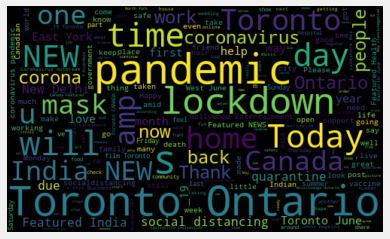

In [32]:
# plot outcome using word cloud
allWords = ' '.join(twts for twts in df_text['text'])
wordCloud = WordCloud(width=500, height=300, random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()


In [33]:
#Create a function to compute the negative, nuetral, and positive sentiment

def getSentAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df_text['analysis'] = df_text['polarity'].apply(getSentAnalysis)

#df_text


In [21]:
#print all of the negative tweets
j=1
sortedDF_text = df_text.sort_values(by=['polarity'])
for i in range(0, sortedDF_text.shape[0]):
    if (sortedDF_text['analysis'][i] == 'Positive'):
        #print(str(j)+ ')' + sortedDF_text['text'][i])
        #print()
        j = j+1

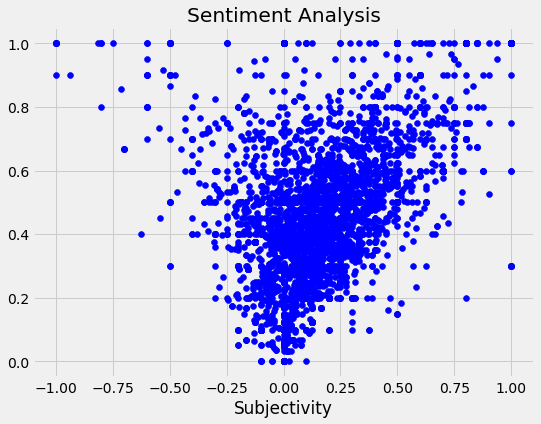

In [22]:
# plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df_text.shape[0]):
    plt.scatter(df_text['polarity'][i],df_text['subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.xlabel('Subjectivity')
plt.show()

In [23]:
#Get the percentages: Positive, Negative, Neutral

ptweets = df_text[df_text.analysis == 'Positive']
ptweets = ptweets ['text']

round ((ptweets.shape[0] /df_text.shape[0]) *100,1)

51.5

In [24]:
# Get the percentage of negative tweets
ntweets = df_text[df_text.analysis == 'Negative']
ntweets = ntweets['text']

round( (ntweets.shape[0] / df_text.shape[0]*100),1)

14.0

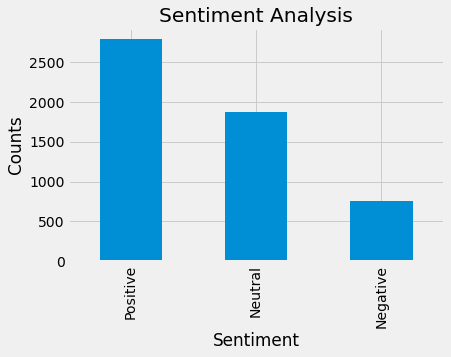

In [25]:
#Show the value counts


df_text['analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_text['analysis'].value_counts().plot(kind='bar')

plt.show('Sentiment')

